# 합성곱 층

입력 위를 필터가 한 칸씩 가로세로로 이동하면서 선형 계산을 통해 특성맵을 만드는 층이다. 패딩, 스트라이드, 폴링 등을 매개변수로 지정할 수 있다. 합성곱 층이 들어간 인공 신경망을 합성곱 신경망(CNN)이라고 한다.

1.   입력층
2.   합성곱층(+입력층에 패딩을 수행)
3.   풀링 층
4.   Flatten 층
5.   밀집층(+소프트맥스 활성화 함수)
6.   출력층



*   필터: 필터=뉴런=커널. 커널의 크기는 (3,3) 또는 (5,5)를 주로 사용한다. 커널의 깊이는 입력의 깊이와 같다.
*   특성맵: 합성곱 층의 출력 배열을 의미한다. 출력의 크기는 (가로, 세로, 특성맵의 개수). 필터의 선형 계산(+활성화 함수) 하나가 특성맵의 하나의 원소를 만든다.
*   패딩: 입력 배열의 주위를 0으로 채우는 것이다. 출력 배열의 크기를 입력 배열의 크기와 동일하게 패딩하는 것을 세임 패딩, 패딩을 사용하지 않는 것을 밸리드 패딩이라고 한다.
*   스트라이드: 필터가 입력 위를 이동하는 크기다. 일반적으로 1픽셀이다.
*   폴링: 특성맵의 가로세로 크기를 줄인다. 겹치지 않고 이동하며 최대값을 고르는 최대 풀링과 평균값을 고르는 평균 풀링이 있다.







In [ ]:
## Conv2D 클래스: 왼쪽→오른쪽, 위→아래 로 이동하는 합성곱을 생성하는 클래스
## Conv2D(필터의 개수, kernel_size 매개변수)

# kernel_size 매개변수: 커널의 크기를 튜플로 지정한다
# activation 매개변수: 활성화 함수를 지정한다
# padding 매개변수: 패딩을 지정한다. 기본값은 밸리드 패딩으로 'valid', 세임 패딩이면 'same'
# strides 매개변수: 스트라이드를 지정한다. 기본값은 1이다

from tensorflow import keras

keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu', padding='same')

<Conv2D name=conv2d, built=False>

In [ ]:
# MaxPooling2D 클래스: 최대 풀링을 수행하는 클래스
# Maxpooling2D(풀링의 크기)
# AveragePooling2D 클래스: 평균 풀링을 수행하는 클래스

keras.layers.MaxPooling2D(2)

<MaxPooling2D name=max_pooling2d, built=False>

의류 이미지를 분류하는 합성곱 신경망 알고리즘을 구해보자

In [ ]:
### 데이터 준비

import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
### 모델 훈련

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         313,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

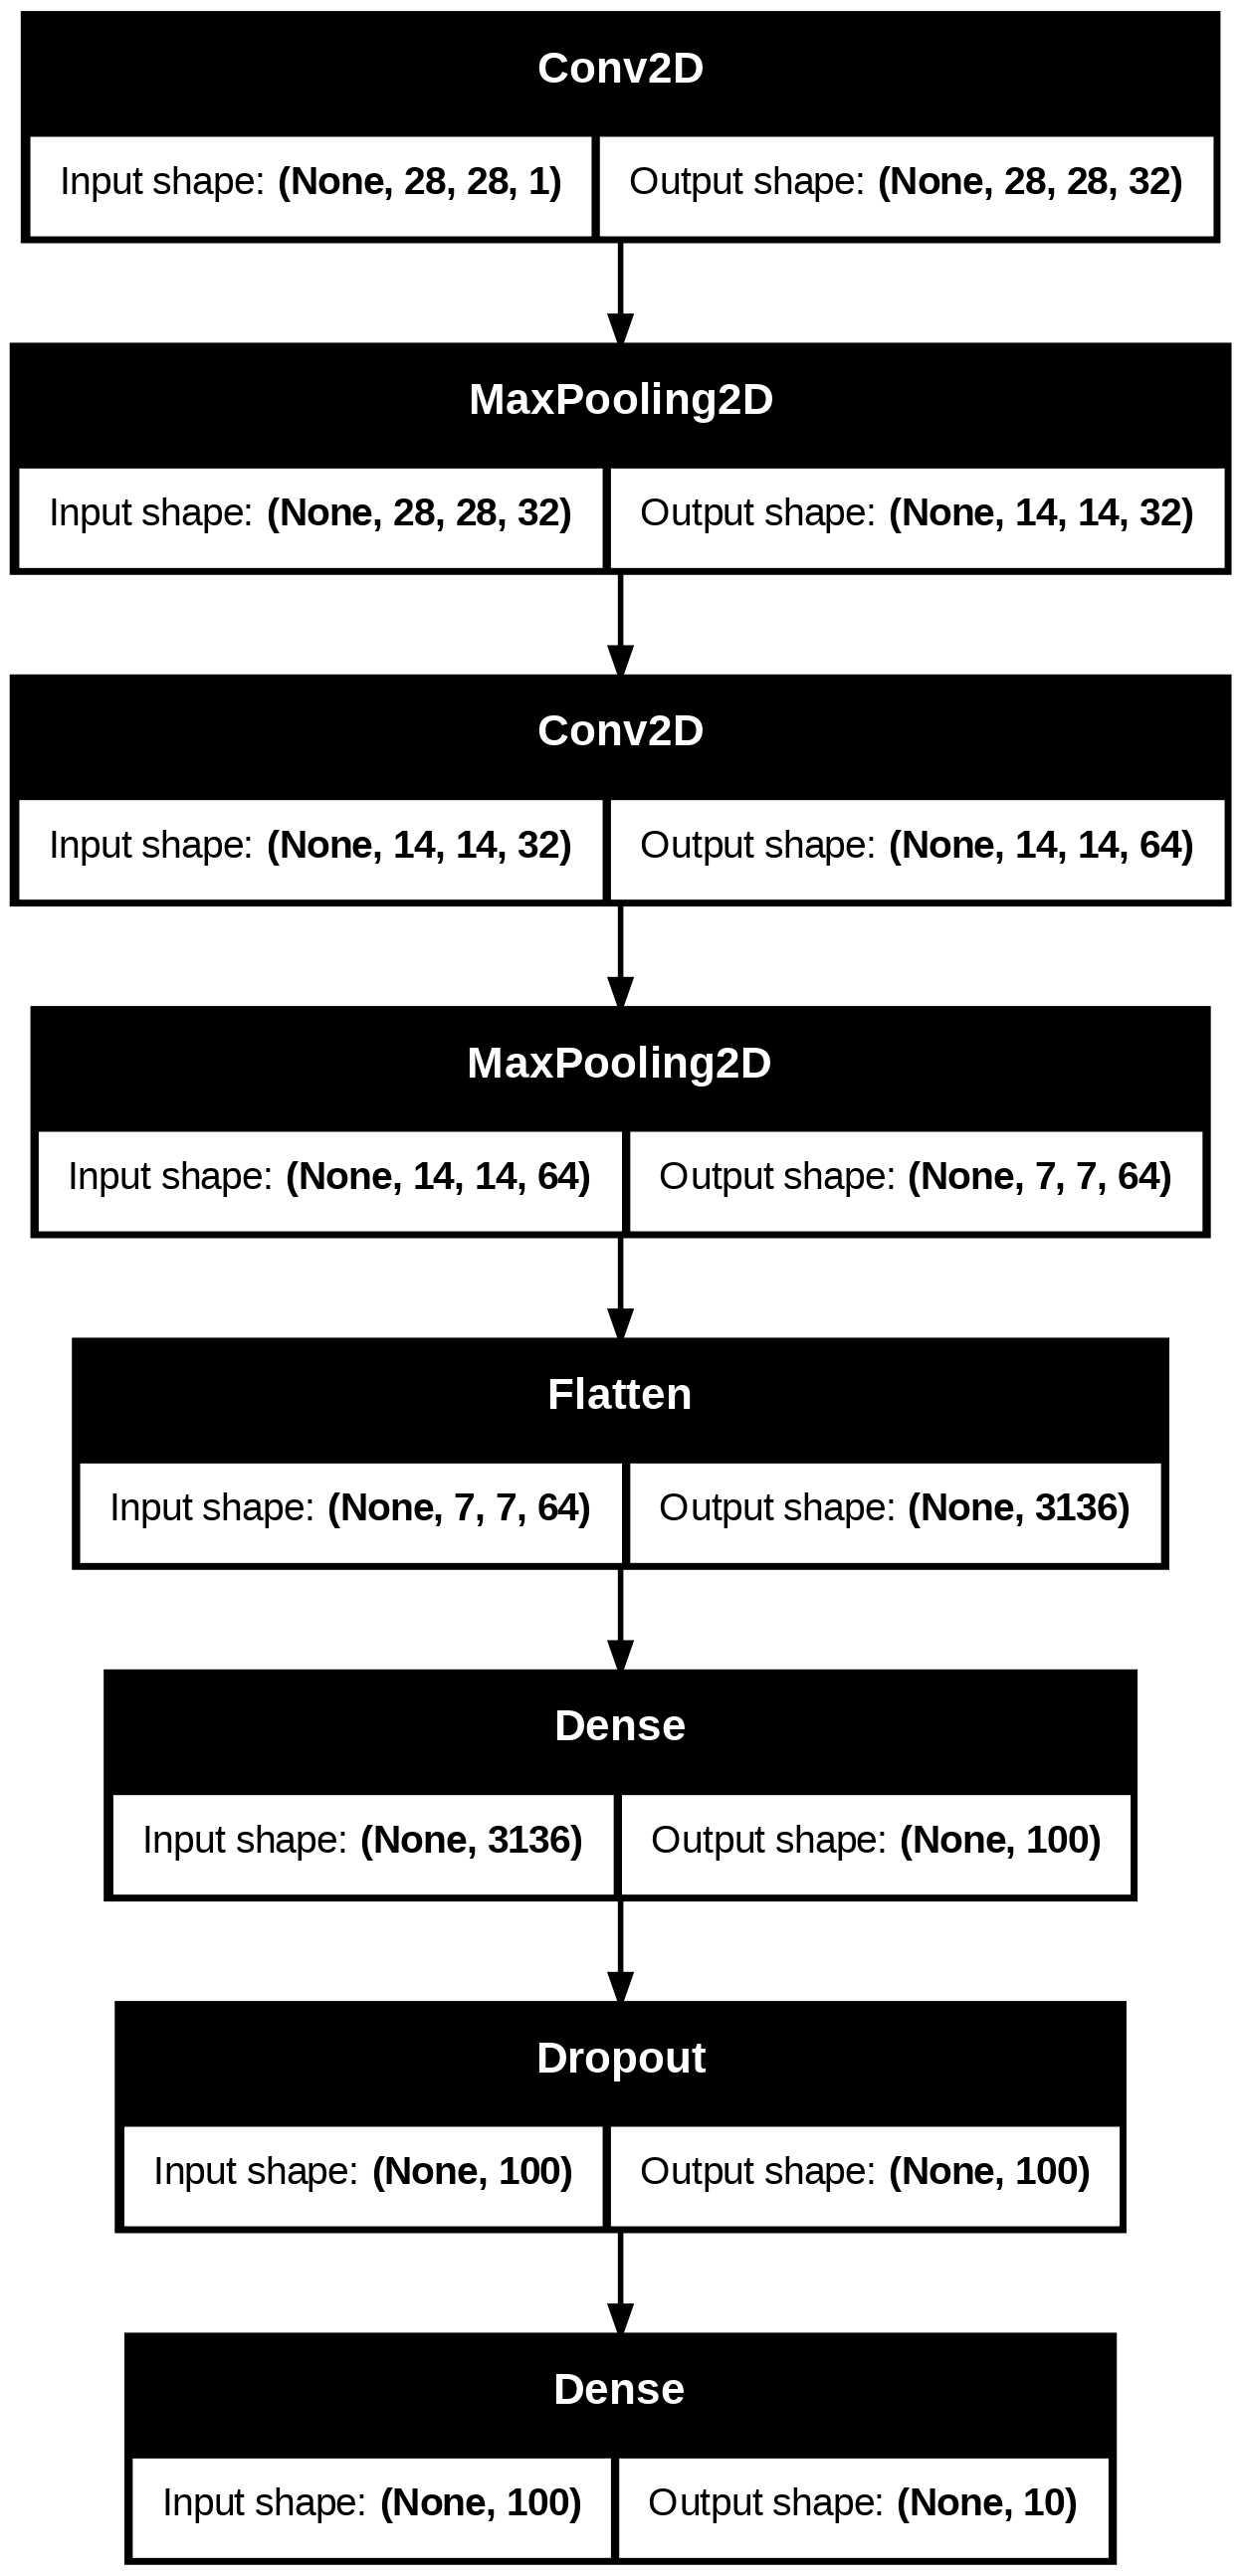

In [ ]:
## plot_model() 함수: 층의 구성을 그림으로 표현한다
## polt_model(모델 객체)
# show_shapes 매개변수: 그림에 입력과 출력의 크기를 표시한다

keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best_cnn_model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7388 - loss: 0.7263 - val_accuracy: 0.8813 - val_loss: 0.3219
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8729 - loss: 0.3568 - val_accuracy: 0.8945 - val_loss: 0.2845
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8953 - loss: 0.2948 - val_accuracy: 0.9006 - val_loss: 0.2559
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9029 - loss: 0.2669 - val_accuracy: 0.9029 - val_loss: 0.2606
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9131 - loss: 0.2413 - val_accuracy: 0.9151 - val_loss: 0.2328
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9202 - loss: 0.2209 - val_accuracy: 0.9195 - val_loss: 0.2194
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9257 - loss: 0.2026 - val_accuracy: 0.9223 - val_loss: 0.2169
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9331 - loss: 0.1823 -

In [ ]:
### 모델 평가

model.evaluate(val_scaled, val_target)
model.evaluate(test_scaled, test_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9251 - loss: 0.2103
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9119 - loss: 0.2561


[0.24409982562065125, 0.9120000004768372]

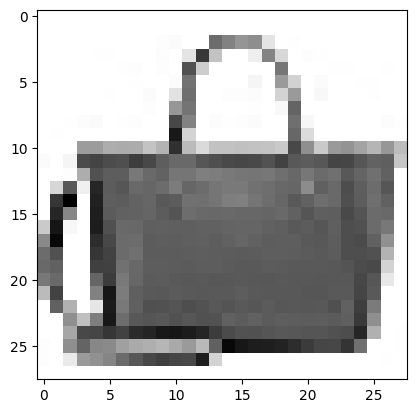

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step
가방


In [ ]:
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()

classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']
preds = model.predict(val_scaled[0:1])
print(classes[np.argmax(preds)])

# 합성곱 신경망의 시각화

합성곱 신경망을 시각화를 통해 이해한다. 가중치 시각화와 특성맵 시각화를 비교하여 각 필터가 이미지의 어떤 부분을 활성화시키는지 확인한다.

1.   가중치 시각화: 합성곱 층의 가중치를 시각화한다. 각 필터가 시각적인 패턴을 어떻게 학습하는지 확인한다.
2.   특성맵 시각화: 합성곱 층의 출력을 시각화한다. 각 필터가 이미지의 어느 부분을 활성화시키는지 확인한다.



In [ ]:
### 1. 가중치 시각화

## layers 속성: 케라스 모델에 추가한 층을 리스트로 저장한다

from tensorflow import keras

model = keras.models.load_model('/content/best_cnn_model.keras')
model.layers

[<Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Conv2D name=conv2d_2, built=True>,
 <MaxPooling2D name=max_pooling2d_2, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

In [ ]:
# weights 속성: 층의 가중치와 절편을 리스트로 저장한다
# [가중치 리스트, 절편 리스트]

conv = model.layers[0]
conv_weights = conv.weights[0].numpy()
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


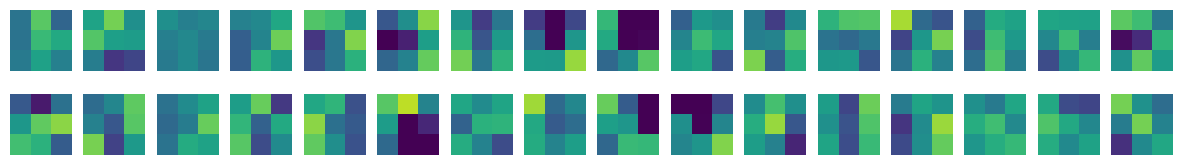

In [ ]:
## imshow() 함수: 배열의 범위에 따라 픽셀의 강도를 상대적으로 표현한다
## 픽셀 값에 따른 절대적인 색이 없는 것이다. 따라서 최솟값과 최댓값을 설정하여 비교한다
# vmin 매개변수: 컬러맵의 최솟값을 지정한다
# vmax 매개변수: 컬러맵의 최댓값을 지정한다

fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
  for j in range(16):
    axs[i,j].imshow(conv_weights[:,:,0,16*i+j], vmin=-0.5, vmax=0.5)
    axs[i,j].axis('off')

plt.show()

함수형 API

케라스에서 신경망 모델을 만드는 방법이다. Model 클래스에 함수형 API로 연결된 입력층과 출력층을 전달하여 생성한다.

In [ ]:
## 입력 객체 생성하는 방법
## 입력 객체 = InputLayer 클래스 객체

# 1. Input() 함수: InputLayer 클래스 객체를 생성한다
# shape 매개변수: 입력의 크기를 지정한다
inputs = keras.Input(shape=(28,28,1))

# 2. inputs 속성: 케라스 모델의 입력층을 저장한다
model.inputs


[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, name=input_layer>]


In [ ]:
## Model 클래스: 함수형 API로 케라스 신경망 모델을 생성한다
## Model(입력 객체, 출력 객체)

conv_acti = keras.Model(model.inputs, model.layers[0].output)
conv2_acti = keras.Model(model.inputs, model.layers[2].output)

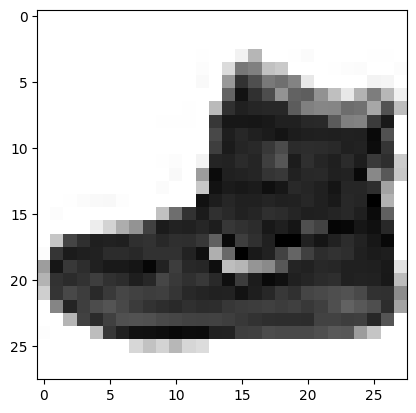

In [ ]:
### 2. 특성맵 시각화

plt.imshow(train_input[0], cmap='gray_r')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


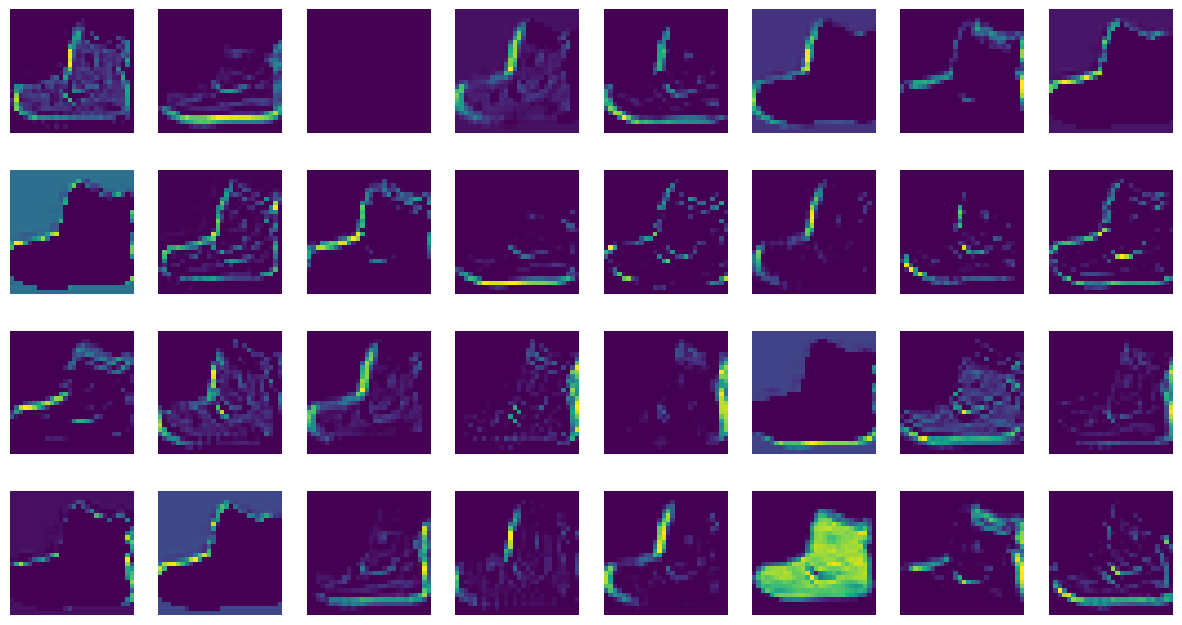

In [ ]:
## 첫번째 합성곱 층: 이미지의 시각적인 정보를 학습한다

inputs = train_input[0:1].reshape(-1,28,28,1) / 255.0
feature_maps = conv_acti.predict(inputs)

fig, axs = plt.subplots(4,8, figsize=(15,8))
for i in range(4):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i,j].axis('off')

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


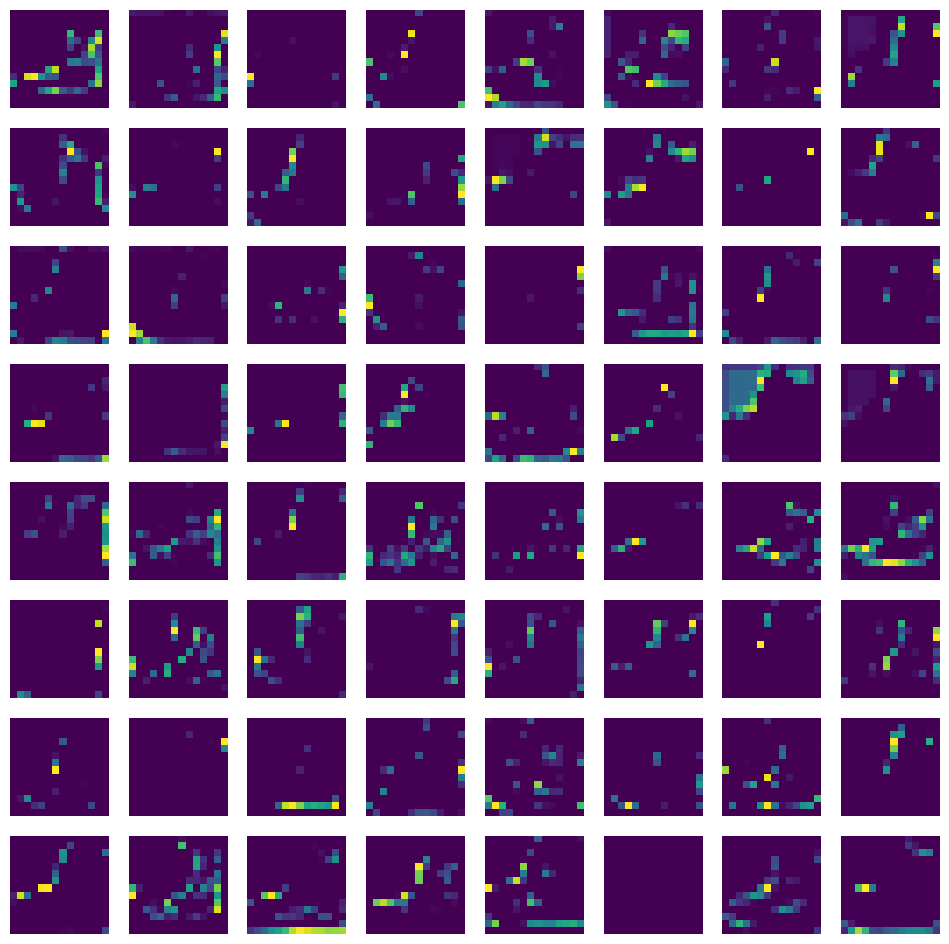

In [ ]:
## 두번째 합성곱 층: 앞쪽에서 감지한 시각적인 정보를 바탕으로 추상적인 정보를 학습한다

feature_maps2 = conv2_acti.predict(inputs)

fig, axs = plt.subplots(8,8, figsize=(12,12))
for i in range(8):
  for j in range(8):
    axs[i,j].imshow(feature_maps2[0,:,:,i*8+j])
    axs[i,j].axis('off')

plt.show()